In [44]:
import pandas as pd

In [116]:
production_df = pd.read_csv('africa_food_production.csv')
supply_df = pd.read_csv('africa_food_supply.csv')

In [117]:
production_df

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


In [118]:
# Filter the dataset for the year 2010 and the item 'Oats'
oats_2010_df = production_df[(production_df['Year'] == 2010) & (production_df['Item'] == 'Oats')]

# Find the country with the highest production of oats in 2010
highest_oats_producer = oats_2010_df.loc[oats_2010_df['Value'].idxmax()]

# Display the result
highest_oats_producer_country = highest_oats_producer['Country']
highest_oats_production_value = highest_oats_producer['Value']

print(f"The country that produced the highest amount of oats in 2010 is {highest_oats_producer_country} with a production value of {highest_oats_production_value}.")


The country that produced the highest amount of oats in 2010 is Algeria with a production value of 88.


In [88]:
supply_df

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

Descriptive Statistics for Production
count    23110.000000
mean       327.785201
std       1607.940343
min          0.000000
25%          3.000000
50%         18.000000
75%        108.000000
max      54000.000000
Name: Value, dtype: float64


C:\Users\User\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


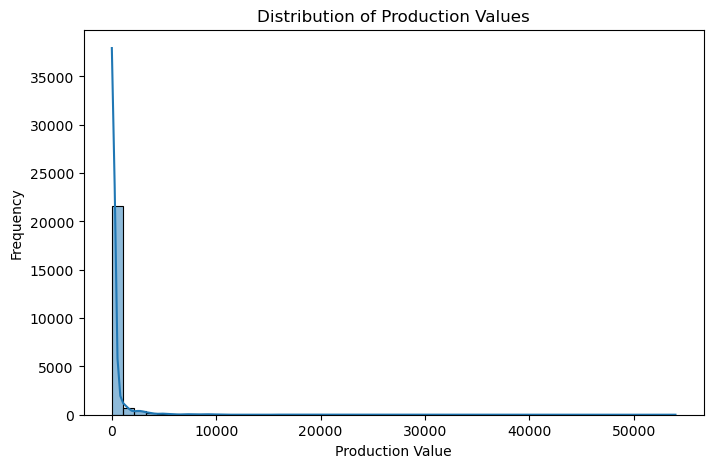

In [6]:
# Descriptive statistics for production data
production_desc = production_df['Value'].describe()

print("Descriptive Statistics for Production")
print(production_desc)

# Distribution of Production Values
plt.figure(figsize=(8, 5))
sns.histplot(production_df['Value'], bins=50, kde=True)
plt.title('Distribution of Production Values')
plt.xlabel('Production Value')
plt.ylabel('Frequency')
plt.savefig('sample_plot11.jpg', format='jpeg')  # Save as JPEG file
plt.savefig('sample_plot11.jpeg', format='jpeg')
plt.show()

Descriptive Statistics for Supply
count     450.000000
mean     2469.775556
std       379.140143
min      1781.000000
25%      2174.000000
50%      2376.000000
75%      2681.750000
max      3561.000000
Name: Value, dtype: float64


C:\Users\User\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


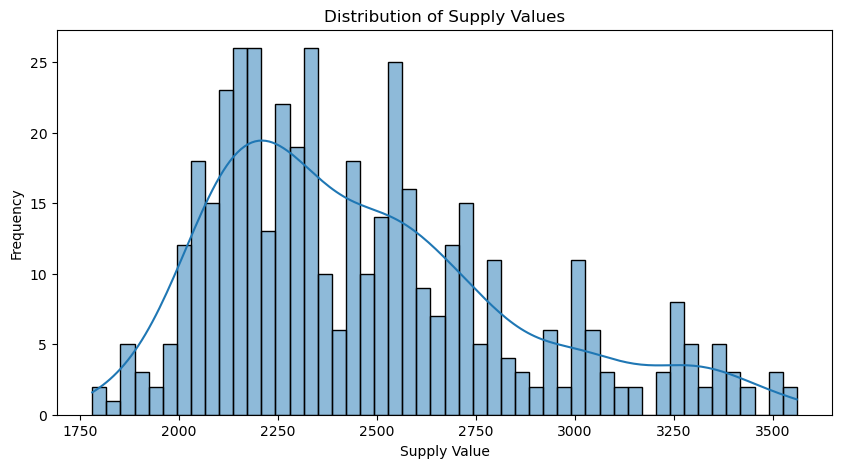

In [7]:
# Descriptive statistics for supply data
supply_desc = supply_df['Value'].describe()

print("Descriptive Statistics for Supply")
print(supply_desc)

# Distribution of Supply Values
plt.figure(figsize=(10, 5))
sns.histplot(supply_df['Value'], bins=50, kde=True)
plt.title('Distribution of Supply Values')
plt.xlabel('Supply Value')
plt.ylabel('Frequency')
plt.savefig('sample_plot12.jpg', format='jpeg') 
plt.show()

In [49]:
import altair as alt

total_value_per_country = production_df.groupby('Country')['Value'].sum().reset_index()

bar_chart = alt.Chart(total_value_per_country).mark_bar().encode(
    x=alt.X('Value:Q', title='Total Value'),
    y=alt.Y('Country:N', sort='-x', title='Country'),
    tooltip=['Country', 'Value']
).properties(
    title='Total Value per Country'
)
plt.savefig('sample_plot13.jpg', format='jpeg') 
bar_chart


C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

<Figure size 640x480 with 0 Axes>

In [50]:
trends_over_time = production_df.groupby(['Country', 'Year'])['Value'].sum().reset_index()

selection = alt.selection_multi(fields=['Country'], bind='legend')

line_chart = alt.Chart(trends_over_time).mark_line(point=True).encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Value:Q', title='Total Value'),
    color=alt.condition(selection, 'Country:N', alt.value('lightgray')),
    tooltip=['Country', 'Year', 'Value']
).properties(
    title='Trend of Total Value Over Years for All Countries'
).add_selection(
    selection
).properties(
    width=800,  # Adjust the width of the chart
    height=700  # Adjust the height of the chart
)

plt.savefig('sample_plot14.jpg', format='jpeg') 
line_chart


C:\Users\User\anaconda33\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_multi' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
C:\Users\User\anaconda33\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

<Figure size 640x480 with 0 Axes>

In [51]:
bar_chart = alt.Chart(trends_over_time).mark_bar().encode(
    x='Year:O',  # O for ordinal (categorical) data on x-axis
    y='Value:Q',  # Q for quantitative data on y-axis
    color='Country:N',  # Color represents country
    tooltip=['Country', 'Year', 'Value']  # Tooltip shows details on hover
).properties(
    title='Total Value Over Years for All Countries',
    width=800,  # Adjust the width of the chart
    height=500  # Adjust the height of the chart
)
plt.savefig('sample_plot15.jpg', format='jpeg')
bar_chart


C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

<Figure size 640x480 with 0 Axes>

In [52]:
nigeria_df = production_df[production_df['Country'] == 'Nigeria']

Item  Beer  Beverages, Fermented  Bovine Meat  Butter, Ghee  \
Year                                                          
2004  1199                  9137          323            10   
2005  1180                  9283          306            10   
2006  1150                  9388          259            10   
2007  1380                  9402          328            11   
2008  1540                  9410          328             9   

Item  Cassava and products  Cephalopods  Cereals, Other  Citrus, Other  \
Year                                                                     
2004                 38845            0              81           3996   
2005                 41565            0              95           4277   
2006                 45721            0              80           3300   
2007                 43410            0              69           3325   
2008                 44582            0              70           3400   

Item  Cocoa Beans and products  Coconut

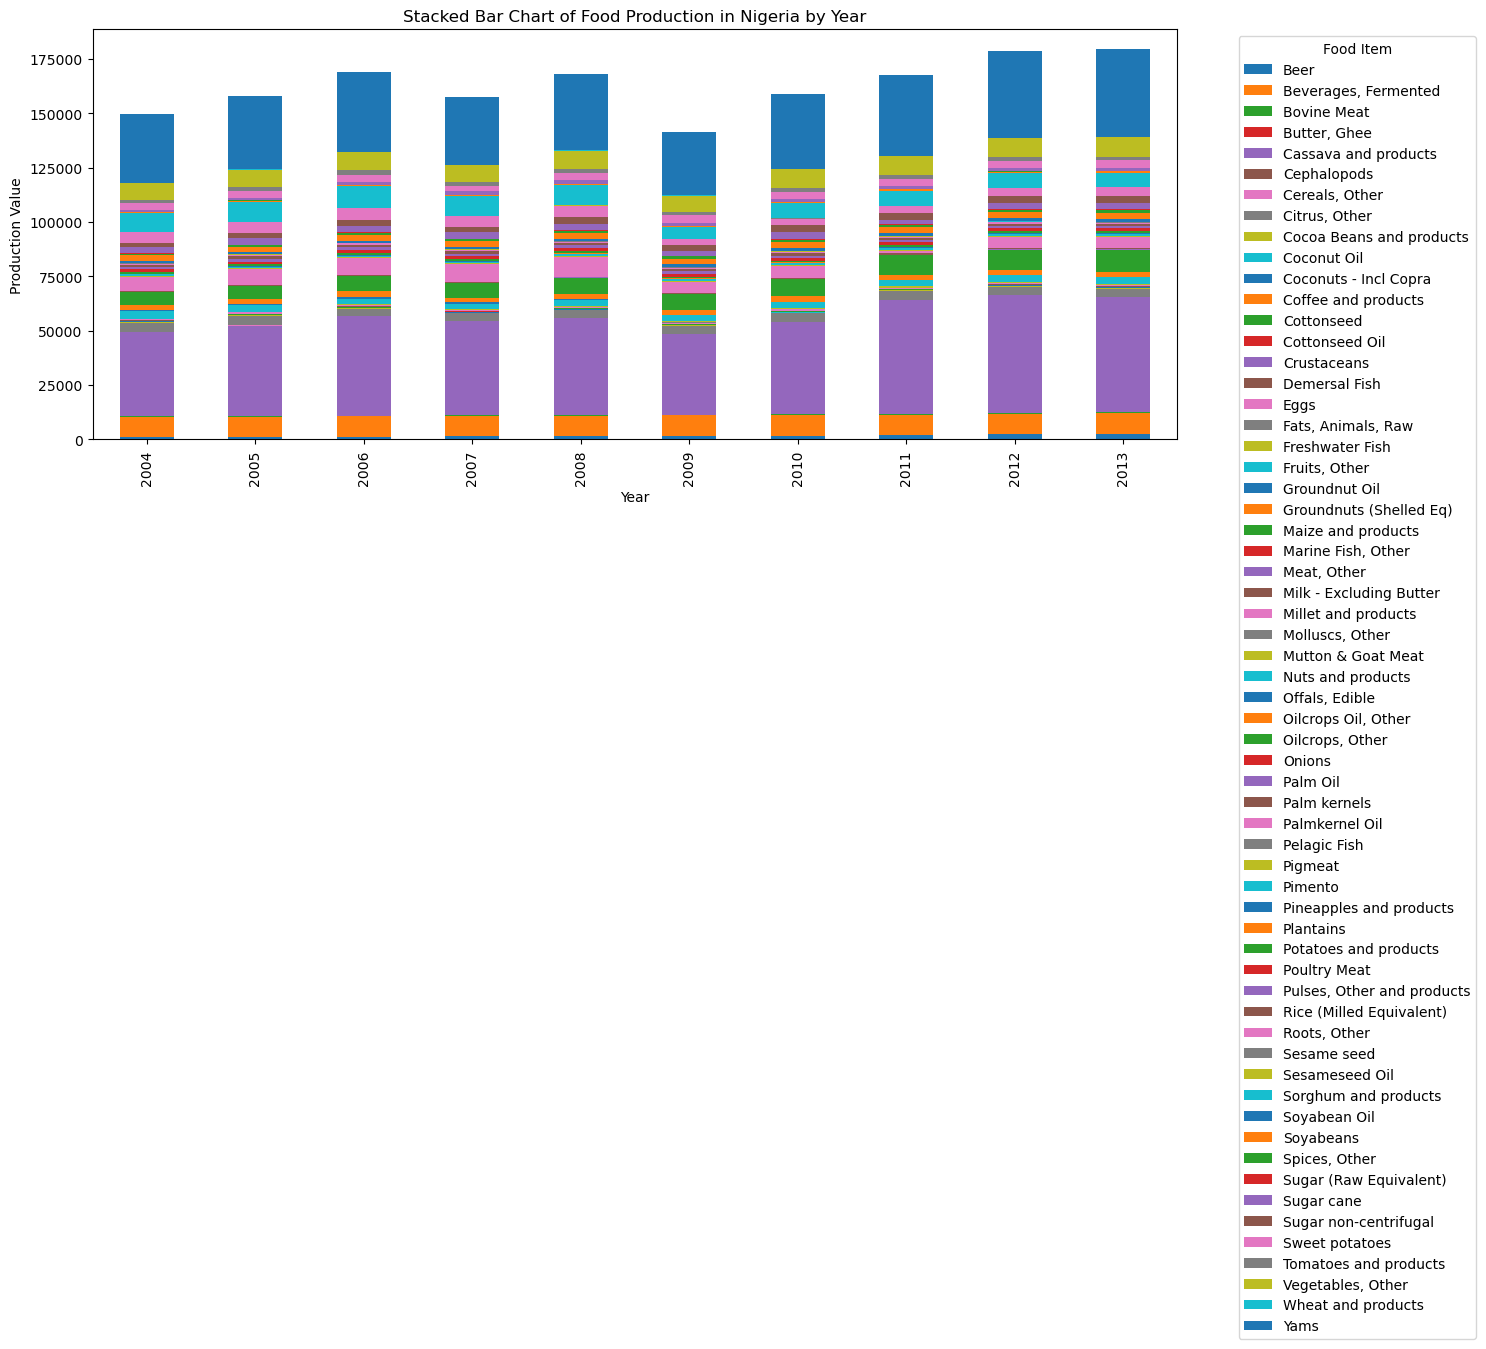

In [53]:
pivot_df = nigeria_df.pivot(index='Year', columns='Item', values='Value').fillna(0)

print(pivot_df.head())

pivot_df.plot(kind='bar', stacked=True, figsize=(15, 10))

plt.xlabel('Year')
plt.ylabel('Production Value')
plt.title('Stacked Bar Chart of Food Production in Nigeria by Year')
plt.legend(title='Food Item', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [54]:
melted_df = pivot_df.reset_index().melt(id_vars='Year', var_name='Food Item', value_name='Production Value')

chart = alt.Chart(melted_df).mark_bar().encode(
    x='Year:O',
    y='sum(Production Value):Q',
    color='Food Item:N',
    tooltip=['Year', 'Food Item', 'Production Value']
).properties(
    title='Stacked Bar Chart of Food Production in Nigeria by Year',
    width=800,
    height=400
).interactive()

# Display the chart
chart

C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [55]:
pivot_df = nigeria_df.pivot(index='Year', columns='Item', values='Value').fillna(0)


pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100


melted_df_percentage = pivot_df_percentage.reset_index().melt(id_vars='Year', var_name='Food Item', value_name='Production Percentage')


chart = alt.Chart(melted_df_percentage).mark_bar().encode(
    x='Year:O',
    y='sum(Production Percentage):Q',
    color='Food Item:N',
    tooltip=['Year', 'Food Item', 'Production Percentage']
).properties(
    title='Percentage-based Stacked Bar Chart of Food Production in Nigeria by Year',
    width=800,
    height=400
).interactive()

# Display the chart
chart


C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [56]:
pivot_df = nigeria_df.pivot(index='Year', columns='Item', values='Value').fillna(0)

pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

melted_df_percentage = pivot_df_percentage.reset_index().melt(id_vars='Year', var_name='Food Item', value_name='Production Percentage')

chart = alt.Chart(melted_df_percentage).mark_bar().encode(
    x='Year:O',
    y='sum(Production Percentage):Q',
    color='Food Item:N',
    tooltip=['Year', 'Food Item', 'Production Percentage']
).properties(
    title='Percentage-based Stacked Bar Chart of Food Production in Nigeria by Year',
    width=800,
    height=400
).interactive()

# Display the chart
chart


C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [89]:
# Sum the production values by Country and Year
production_sum = production_df.groupby(['Country', 'Year'])['Value'].sum().reset_index()
production_sum.rename(columns={'Value': 'Food_Produced'}, inplace=True)

# Display the summed up production data
print(production_sum.head())


   Country  Year  Food_Produced
0  Algeria  2004          15536
1  Algeria  2005          15667
2  Algeria  2006          16417
3  Algeria  2007          14763
4  Algeria  2008          13841


In [90]:
production_sum.head()

,Country,Year,Food_Produced
0,Algeria,2004,15536
1,Algeria,2005,15667
2,Algeria,2006,16417
3,Algeria,2007,14763
4,Algeria,2008,13841


In [91]:
production_sum.shape

(450, 3)

In [92]:
supply_df.shape

(450, 3)

In [93]:
# Merge the summarized production data with the supply data on 'Country' and 'Year'
merged_df = pd.merge(production_sum, supply_df, on=['Country', 'Year'], how='inner')

In [103]:
# Overview of the merged data
merged_df.head()

,Country,Year,Food_Produced,Food Supplied
0,Algeria,2004,15536,2987
1,Algeria,2005,15667,2958
2,Algeria,2006,16417,3047
3,Algeria,2007,14763,3041
4,Algeria,2008,13841,3048


In [104]:
merged_df

,Country,Year,Food_Produced,Food Supplied
0,Algeria,2004,15536,2987
1,Algeria,2005,15667,2958
2,Algeria,2006,16417,3047
3,Algeria,2007,14763,3041
4,Algeria,2008,13841,3048
...,...,...,...,...
445,Zimbabwe,2009,5754,2147
446,Zimbabwe,2010,6777,2168
447,Zimbabwe,2011,7551,2200
448,Zimbabwe,2012,8173,2197


In [97]:
merged_df.rename(columns={'Value': 'Food Supplied'}, inplace=True)

In [98]:
merged_df.rename(columns={'Total_Production': 'Food_Produced'}, inplace=True)

In [109]:
merged_df

,Country,Year,Food_Produced,Food Supplied
0,Algeria,2004,15536,2987
1,Algeria,2005,15667,2958
2,Algeria,2006,16417,3047
3,Algeria,2007,14763,3041
4,Algeria,2008,13841,3048
...,...,...,...,...
445,Zimbabwe,2009,5754,2147
446,Zimbabwe,2010,6777,2168
447,Zimbabwe,2011,7551,2200
448,Zimbabwe,2012,8173,2197


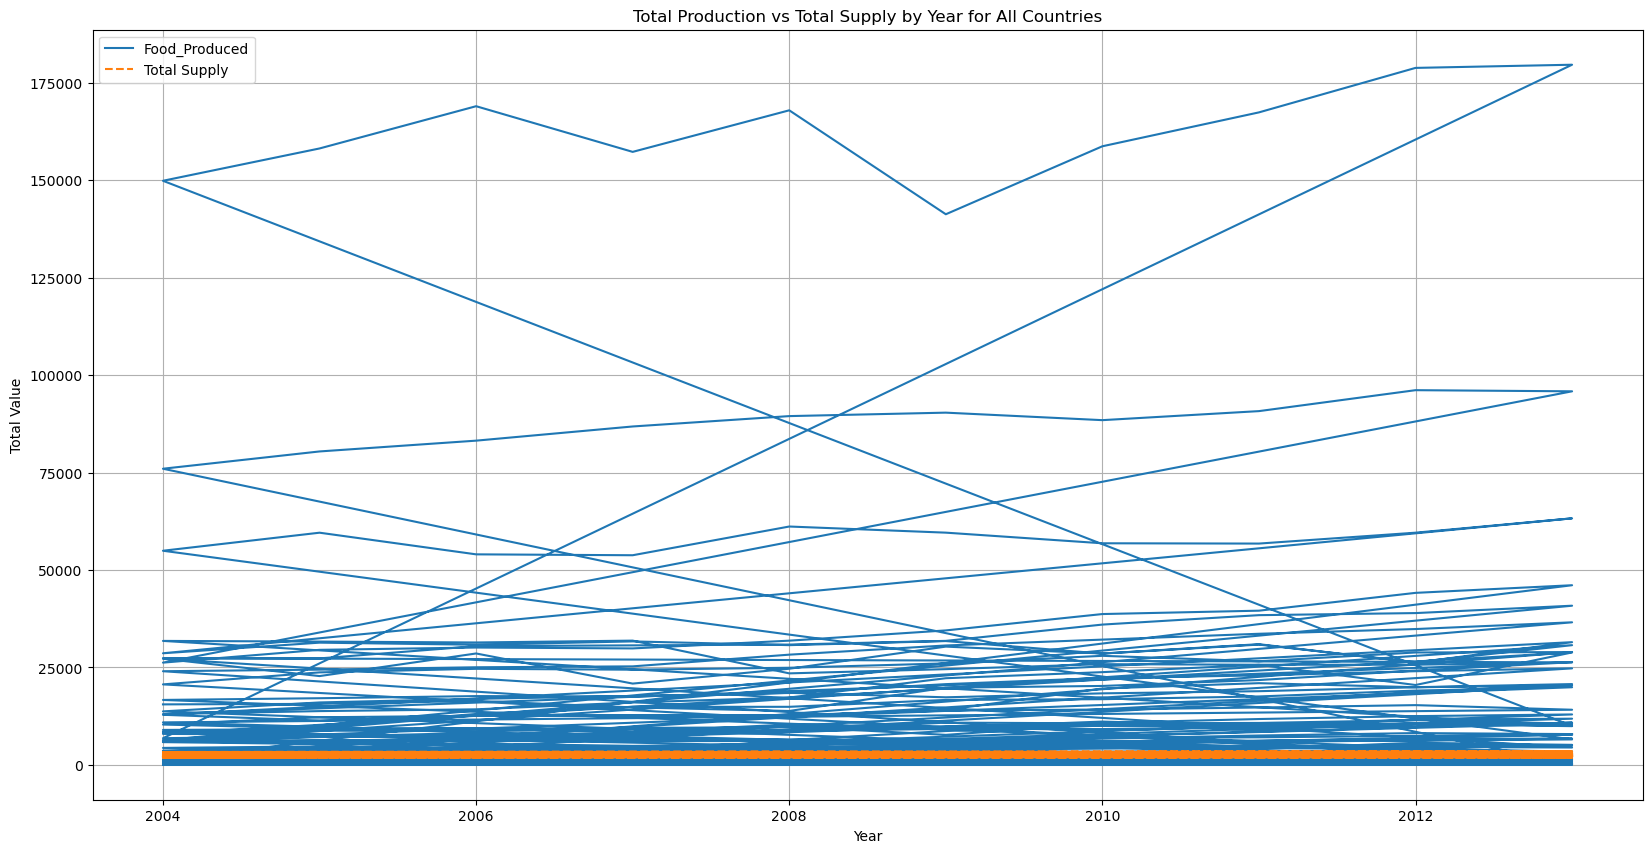

In [83]:
plt.figure(figsize=(20, 10))
plt.plot(merged_df['Year'], merged_df['Food_Produced'], label='Food_Produced')
plt.plot(merged_df['Year'], merged_df['Food Supplied'], label='Total Supply', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.title('Total Production vs Total Supply by Year for All Countries')
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('sample_plot16.jpg', format='jpeg')
plt.show()
#Food_Produced	Food Supplied

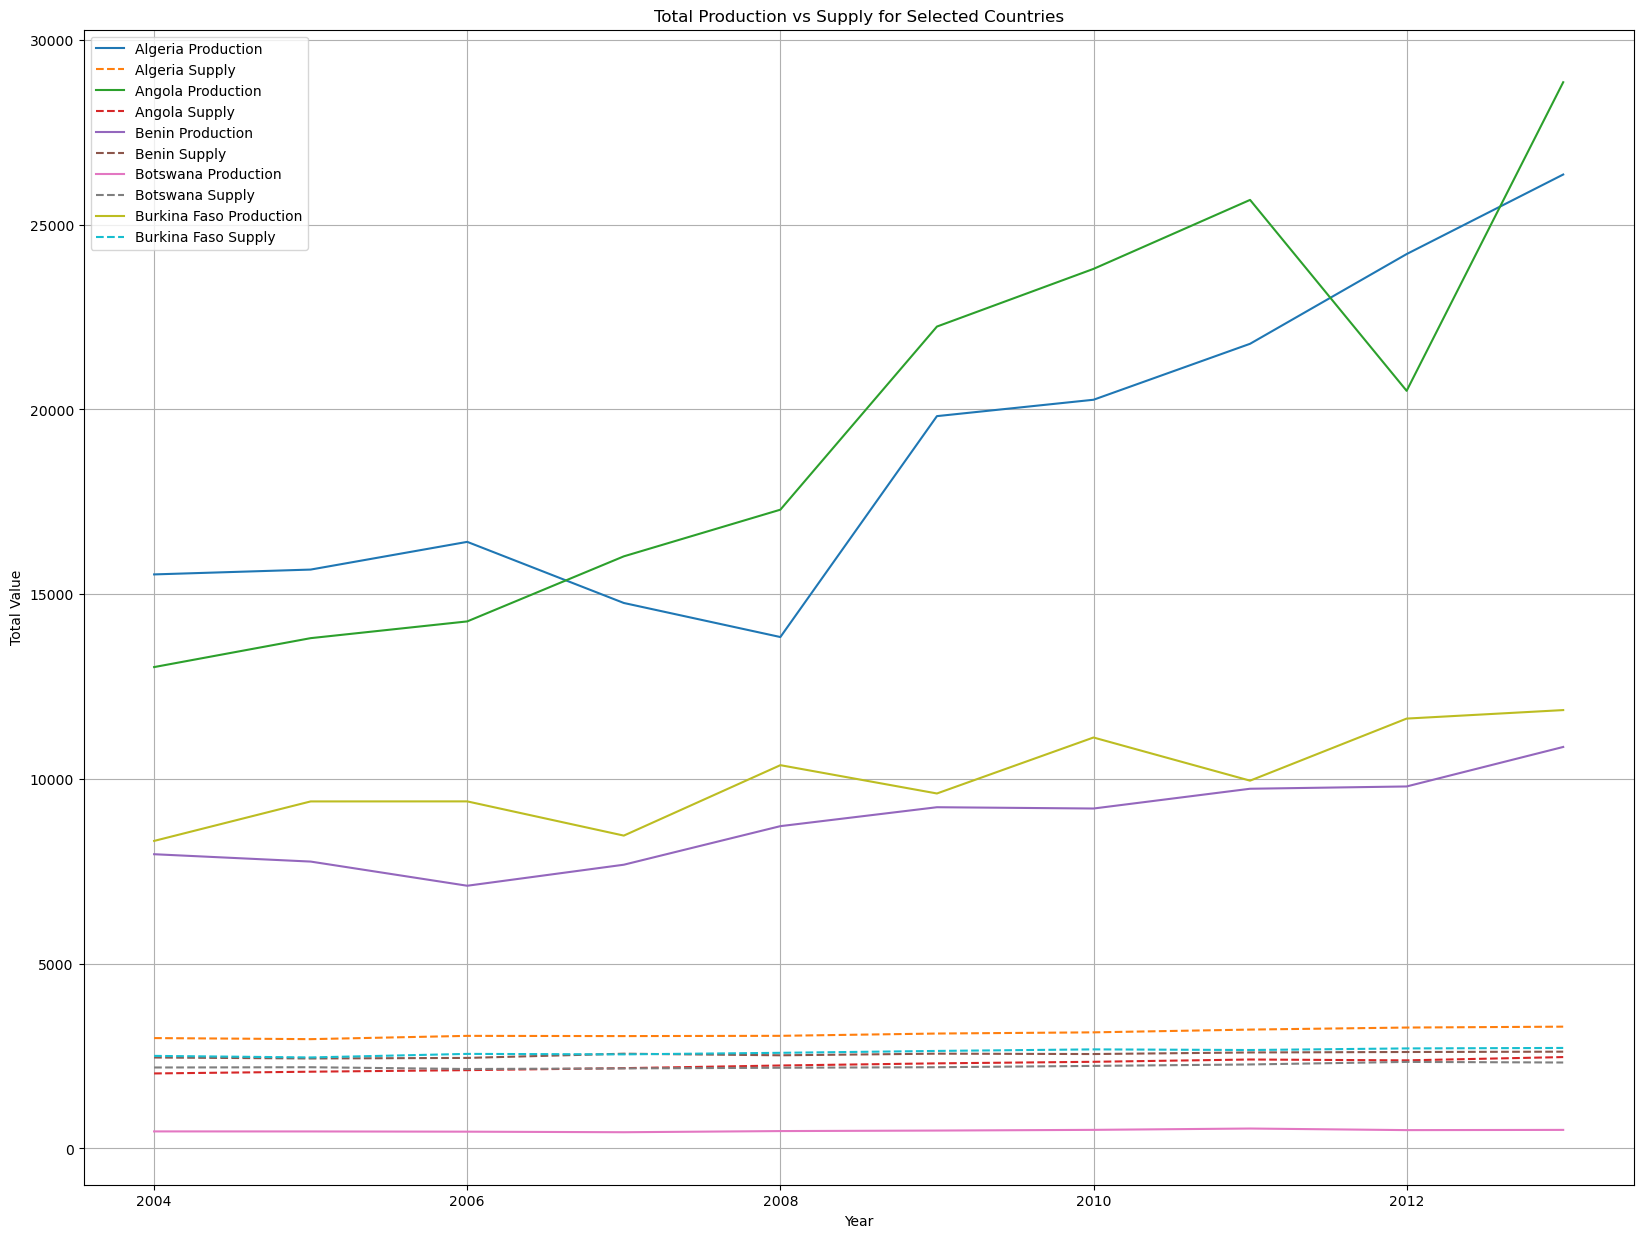

In [64]:
plt.figure(figsize=(20, 15))
for country in merged_df['Country'].unique()[:5]:  # Analyzing first 5 countries for brevity
    subset = merged_df[merged_df['Country'] == country]
    plt.plot(subset['Year'], subset['Food_Produced'], label=f'{country} Production')
    plt.plot(subset['Year'], subset['Food Supplied'], label=f'{country} Supply', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.title('Total Production vs Supply for Selected Countries')
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('sample_plot17.jpg', format='jpeg')
plt.show()

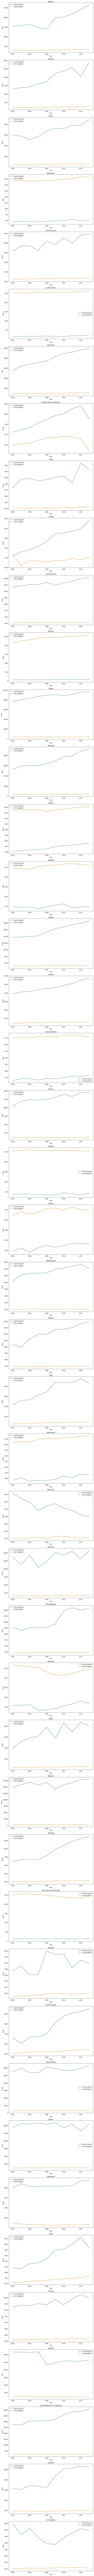

In [65]:
countries = merged_df['Country'].unique()
fig, axes = plt.subplots(nrows=len(countries), ncols=1, figsize=(10, 6*len(countries)))

for i, country in enumerate(countries):
    country_data = merged_df[merged_df['Country'] == country]
    axes[i].plot(country_data['Year'], country_data['Food_Produced'], label='Food Produced')
    axes[i].plot(country_data['Year'], country_data['Food Supplied'], label='Food Supplied')
    axes[i].set_title(country)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Food')
    axes[i].legend()

plt.tight_layout()
plt.savefig('sample_plot17.jpg', format='jpeg')
plt.show()


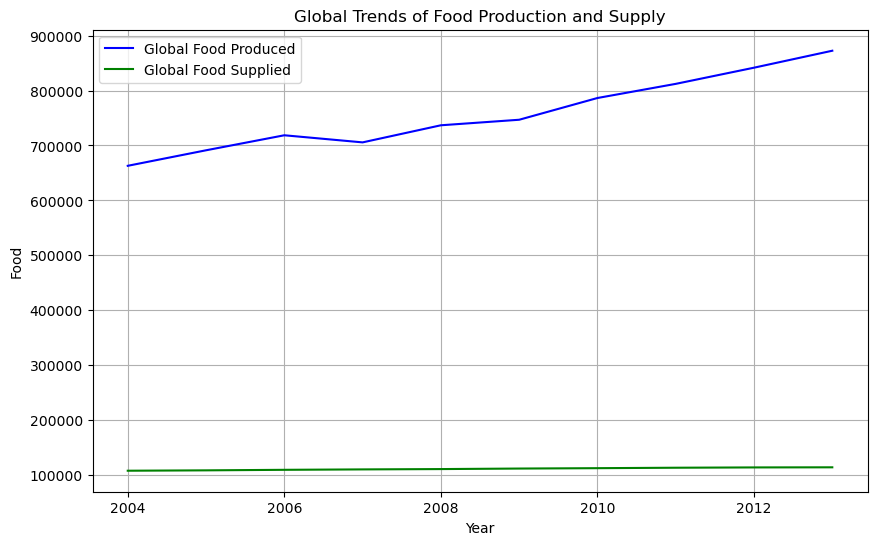

In [66]:
global_data = merged_df.groupby('Year').agg({'Food_Produced': 'sum', 'Food Supplied': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(global_data['Year'], global_data['Food_Produced'], label='Global Food Produced', color='blue')
plt.plot(global_data['Year'], global_data['Food Supplied'], label='Global Food Supplied', color='green')
plt.xlabel('Year')
plt.ylabel('Food')
plt.title('Global Trends of Food Production and Supply')
plt.legend()
plt.grid(True)
plt.savefig('sample_plot19.jpg', format='jpeg')
plt.show()


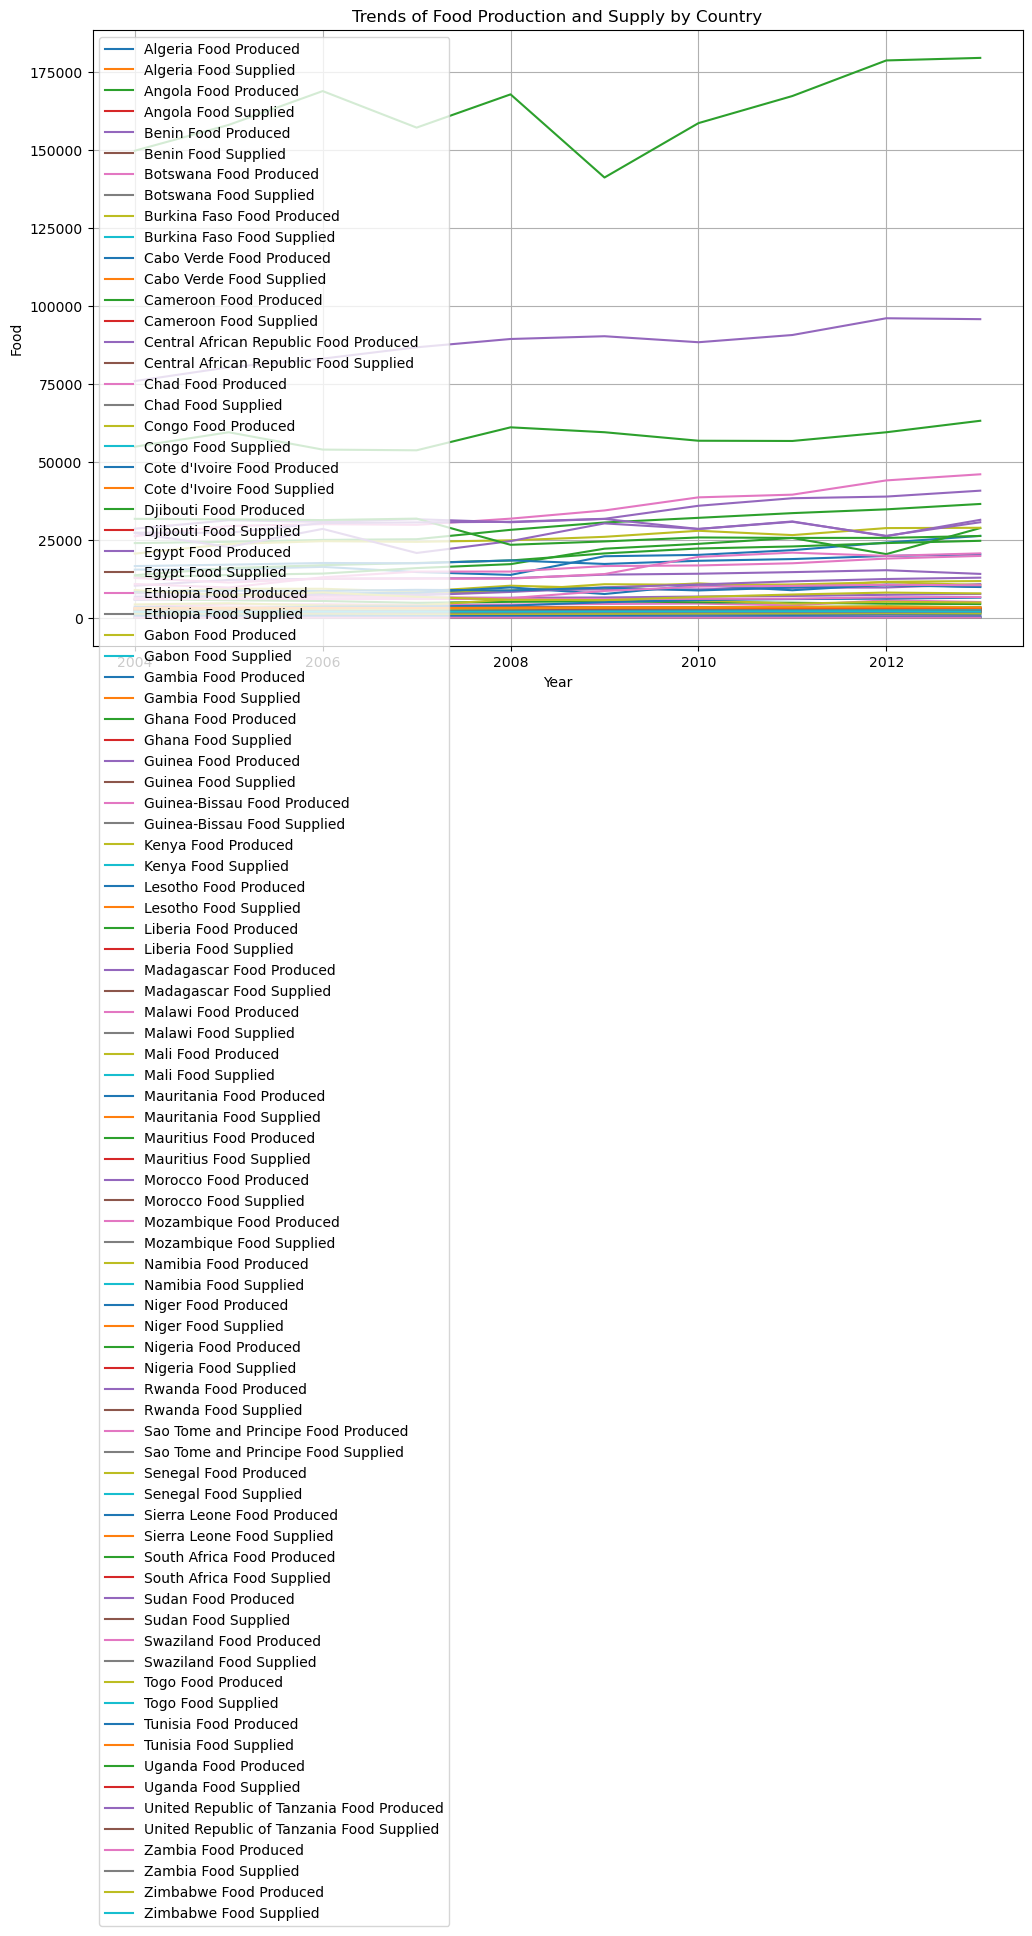

In [67]:
countries = merged_df['Country'].unique()

plt.figure(figsize=(12, 8))
for country in countries:
    country_data = merged_df[merged_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Food_Produced'], label=f'{country} Food Produced')
    plt.plot(country_data['Year'], country_data['Food Supplied'], label=f'{country} Food Supplied')

plt.xlabel('Year')
plt.ylabel('Food')
plt.title('Trends of Food Production and Supply by Country')
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('sample_plot20.jpg', format='jpeg')
plt.show()


In [68]:
melted_df = pd.melt(merged_df, id_vars=['Country', 'Year'], value_vars=['Food_Produced', 'Food Supplied'], var_name='Variable', value_name='Food')

line_chart = alt.Chart(melted_df).mark_line().encode(
    x='Year:O',
    y=alt.Y('Food:Q', title='Food'),
    color='Country:N',
    strokeDash=alt.condition(alt.datum.Variable == 'Food_Produced', alt.value([5]), alt.value([0]))
).properties(
    width=800,  # Adjust width
    height=600, # Adjust height
    title='Trends of Food Production and Supply by Country'
).interactive()
plt.savefig('sample_plot21.jpg', format='jpeg')
line_chart


C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

<Figure size 640x480 with 0 Axes>

In [33]:
# Reshape the data for Altair plotting
melted_df = pd.melt(merged_df, id_vars=['Country', 'Year'], value_vars=['Food_Produced', 'Food Supplied'], var_name='Variable', value_name='Food')

# Plotting the trends for all countries using Altair
line_chart = alt.Chart(melted_df).mark_line().encode(
    x='Year:O',
    y='Food:Q',
    color='Country:N',
    tooltip=['Country', 'Variable', 'Year', 'Food']
).properties(
    width=800,  # Adjust width
    height=600, # Adjust height
    title='Trends of Food Production and Supply by Country'
).interactive()
plt.savefig('sample_plot22.jpg', format='jpeg')
line_chart


C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

<Figure size 640x480 with 0 Axes>

In [69]:
melted_df = pd.melt(merged_df, id_vars=['Country', 'Year'], value_vars=['Food_Produced', 'Food Supplied'], var_name='Variable', value_name='Food')

production_df = melted_df[melted_df['Variable'] == 'Food_Produced']
supply_df = melted_df[melted_df['Variable'] == 'Food Supplied']

production_chart = alt.Chart(production_df).mark_line().encode(
    x='Year:O',
    y='Food:Q',
    color='Country:N',
    tooltip=['Country', 'Variable', 'Year', 'Food']
).properties(
    width=800,  # Adjust width
    height=300, # Adjust height
    title='Trends of Food Production by Country'
).interactive()

supply_chart = alt.Chart(supply_df).mark_line().encode(
    x='Year:O',
    y='Food:Q',
    color='Country:N',
    tooltip=['Country', 'Variable', 'Year', 'Food']
).properties(
    width=800,  # Adjust width
    height=300, # Adjust height
    title='Trends of Food Supply by Country'
).interactive()
plt.savefig('sample_plot23.jpg', format='jpeg')
production_chart | supply_chart


C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.

alt.HConcatChart(...)

<Figure size 640x480 with 0 Axes>

In [70]:
melted_df = pd.melt(merged_df, id_vars=['Country', 'Year'], value_vars=['Food_Produced', 'Food Supplied'], var_name='Variable', value_name='Food')

production_df = melted_df[melted_df['Variable'] == 'Food_Produced']
supply_df = melted_df[melted_df['Variable'] == 'Food Supplied']

production_chart = alt.Chart(production_df).mark_line().encode(
    x='Year:O',
    y='Food:Q',
    color='Country:N',
    tooltip=['Country', 'Variable', 'Year', 'Food']
)

supply_chart = alt.Chart(supply_df).mark_line().encode(
    x='Year:O',
    y='Food:Q',
    color='Country:N',
    tooltip=['Country', 'Variable', 'Year', 'Food']
)

combined_chart = (production_chart + supply_chart).properties(
    width=800,  # Adjust width
    height=400, # Adjust height
    title='Trends of Food Production and Supply by Country'
).resolve_scale(y='independent').interactive()
plt.savefig('sample_plot24.jpg', format='jpeg')
combined_chart


C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.

alt.LayerChart(...)

<Figure size 640x480 with 0 Axes>

In [71]:
melted_df = pd.melt(merged_df, id_vars=['Country', 'Year'], value_vars=['Food_Produced', 'Food Supplied'], var_name='Variable', value_name='Food')

production_df = melted_df[melted_df['Variable'] == 'Food_Produced']
supply_df = melted_df[melted_df['Variable'] == 'Food Supplied']

production_chart = alt.Chart(production_df).mark_line().encode(
    x='Year:O',
    y='Food:Q',
    color='Country:N',
    tooltip=['Country', 'Variable', 'Year', 'Food']
)

supply_chart = alt.Chart(supply_df).mark_line(strokeDash=[5, 5]).encode(
    x='Year:O',
    y='Food:Q',
    color='Country:N',
    tooltip=['Country', 'Variable', 'Year', 'Food']
)

combined_chart = (production_chart + supply_chart).properties(
    width=800,  # Adjust width
    height=400, # Adjust height
    title='Trends of Food Production and Supply by Country'
).resolve_scale(y='independent').interactive()

combined_chart


C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.

alt.LayerChart(...)

In [73]:
pip install pandas altair altair_saver vega_datasets altair_viewer


   ---------------------------------------- 0.0/89.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/89.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/89.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/89.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/89.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/89.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/89.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/89.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/89.3 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/89.3 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/89.3 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/89.3 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/89.3 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/89.3 kB ? eta -:--:--
   ---- ------

In [75]:
import altair as alt
from altair_saver import save

In [115]:
# Boxplot for Food Production
boxplot = alt.Chart(merged_df).mark_boxplot().encode(
    x='Year:O',
    y='Food_Produced:Q',
    tooltip=['Country', 'Food_Produced:Q']
).properties(
    title='Boxplot of Food Production Over the Years',
    width=800,
    height=400
)

# Add lines for average and median food production
average_line = alt.Chart(merged_df).mark_rule(color='red').encode(
    y='mean(Food_Produced):Q',
    size=alt.value(2)
)

median_line = alt.Chart(merged_df).mark_rule(color='blue').encode(
    y='median(Food_Produced):Q',
    size=alt.value(2)
)

# Combine boxplot with average and median lines
production_chart = (boxplot + average_line + median_line).properties(
    title='Food Production: Boxplot with Average (red) and Median (blue) Lines'
)

# Prepare data for line chart comparison
line_chart_data = merged_df.groupby('Year').agg(
    Avg_Food_Produced=('Food_Produced', 'mean'),
    Avg_Food_Consumed=('Food Supplied', 'mean')
).reset_index()

# Line chart for comparison
line_chart = alt.Chart(line_chart_data).transform_fold(
    ['Avg_Food_Produced', 'Avg_Food Supplied'],
    as_=['Variable', 'Value']
).mark_line().encode(
    x='Year:O',
    y='Value:Q',
    color='Variable:N'
).properties(
    title='Comparison of Average Food Production And Food Supplied Over the Years',
    width=800,
    height=400
)

# Combine all charts
combined_chart = alt.vconcat(production_chart, line_chart).resolve_scale(
    y='independent'
)

combined_chart

C:\Users\User\anaconda33\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.VConcatChart(...)

In [100]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [114]:
# Correlation Analysis
correlation = production_df['Food'].corr(supply_df['Food'])
print("Correlation between food production and supply:", correlation)


Correlation between food production and supply: nan
